# Глубинное обучение, ИИ ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

### Оценивание и штрафы

Максимально допустимая оценка за работу без бонусов — 10 баллов. Сдавать задание после указанного срока жесткого дедлайна нельзя.

Сдача работы после мягкого дедлайна штрафуется ступенчато, -1 балл в сутки. Один раз за модуль студентам предоставляется возможность использовать отсрочку и сдать в жесткий дедлайн без штрафа.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Использование генеративных моделей допустимо на следующих условиях:
- Количество кода, написанное генеративными моделями, не превышает 30%
- Указана модель, использованная для генерации, а также промпт
- В конце работы необходимо описать свой опыт использования генеративного ИИ для решения данного домашнего задания. Укажите как часто Вам приходилось исправлять код своими руками или просить модель что-то исправить. Было ли это быстрее, чем написать код самим? 

В случае невыполнения этих требований работа не оценивается и оценка за неё не превышает 0 баллов.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

plt.rcParams.update({"font.size": 16})
sns.set_style("whitegrid")
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [2]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [2]:
import wandb
wandb.finish()
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: gkonoff (gkonoff-hse) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
df = pd.read_csv("data.txt.zip", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

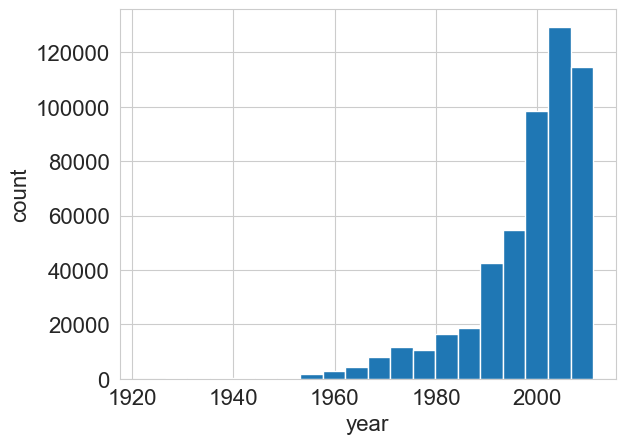

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel("year")
plt.ylabel("count")
plt.show()
print(f"Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}")
print(f"Unique values: {np.unique(df.iloc[:, 0]).size}")

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе (также пропишите текстом, какая константа будет лучшей для MSE).

In [7]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# 1. Обучаем модель
ridge_model = Ridge(alpha=1.0)  # default
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.2f}")

# 2. Константная модель
# Для MSE, лучший константный прогноз - это среднее таргета, т.к.
# среднее минимизирует сумму квадратов отклонений
best_constant = y_train.mean()
y_pred_constant = np.full_like(y_test, best_constant)
mse_constant = mean_squared_error(y_test, y_pred_constant)

print(f"Best Constant Prediction MSE: {mse_constant:.2f}")
print(f"Best Constant Value: {best_constant:.2f}")

Ridge Regression MSE: 89.75
Best Constant Prediction MSE: 117.83
Best Constant Value: 1998.38


**Ответ:** 
Для MSE, лучший константный прогноз - это среднее таргета, т.к. среднее минимизирует сумму квадратов отклонений.

Лучшая константа = 1998.38

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0xE2E4
)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [13]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="train")
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label="val")
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label="train")
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label="val")

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale("log")

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale("log")

    for ax in axs:
        ax.set_xlabel("epoch")
        ax.legend()

    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("MSE")
    plt.show()


def train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=True,
    wandb=None,
):
    """
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}")
            if verbose
            else train_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            """
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            """
            # Predict
            optimizer.zero_grad()                   # Reset gradients
            predictions = model(X_batch)            # Forward pass
            loss = criterion(predictions, y_batch)  # Loss function
            loss.backward()                         # Backward pass (backprop)
            optimizer.step()                        # Update weights

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]
        if wandb:
            wandb.log(
                {
                    "train_loss": train_losses[-1],
                    "train_metric": train_metrics[-1],
                }
            )

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
            if verbose
            else val_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                """
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                """
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]
        if wandb:
            wandb.log(
                {
                    "val_loss": val_losses[-1],
                    "val_metric": val_metrics[-1],
                }
            )

        # if verbose:
        #     plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f"Validation MSE: {val_metrics[-1]:.3f}")

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [11]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ


# Конвертируем в PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)

# Годы у нас 1922-2011, поэтому просто вычтем 1992 и получим 0-89
y_train_tensor = torch.tensor(y_train - 1922, dtype=torch.long)  # Long для CrossEntropyLoss
y_val_tensor = torch.tensor(y_val - 1922, dtype=torch.long)

# Создадим TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 128
num_classes = 90
model_1_2 = nn.Sequential(
    nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, num_classes)
)

lr = 1e-2
batch_size = 64
num_epochs = 6

# инициализируем проект
wandb.init(project="dl-hw1", name="classification-1.2",
           config={
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target",
            "optimizer": "SGD",
            "loss": "CrossEntropyLoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_1_2, log="all", log_freq=10)
wandb.config.update(model_1_2.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_1_2,
    optimizer=torch.optim.SGD(model_1_2.parameters(), lr=lr),
    criterion=nn.CrossEntropyLoss(),
    metric=lambda y_pred, y_true: (torch.max(y_pred, dim=1)[1].float() - y_true.float()).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()

Validating 6/6: 100%|██████████| 1510/1510 [00:00<00:00, 2022.68it/s, loss=3.65, MSE=292] 

Validation MSE: 195.109
Final training MSE: 194.28
Final validation MSE: 195.11


train_loss,█▁▁▁▁▁
train_metric,█▁▁▁▁▁
val_loss,█▄▂▂▁▁
val_metric,▄█▇▅▁▄
train_loss,3.49973
train_metric,194.28053
val_loss,3.4926
val_metric,195.10853


**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:**

**Сравнение с бейзлайном:**

Нейросеть, обученная как классификатор, показала результат `Validation MSE ≈ 195.11`. Этот результат:

- Значительно хуже, чем у Ridge регрессии (`MSE ≈ 89.75`).
- Также хуже, чем у константного предсказания (`MSE ≈ 117.83`).

Среднеквадратичное отклонение составляет `√195.11 ≈ 13.97` лет, что существенно больше ошибки Ridge регрессии (`√89.75 ≈ 9.47` лет).

**Отсутствие переобучения:**

Значения MSE на обучающей (`≈ 194.28`) и валидационной (`≈ 195.11`) выборках очень близки, что говорит об отсутствии переобучения. Однако это подтверждает, что модель в данной постановке (*классификация*) достигла своего предела и не может эффективно решить задачу регрессии.

**Классификация не подходит для этой задачи:**

- **Потеря порядковой информации:** Годы воспринимаются как несвязанные категории.
- **Большое количество классов (90):** Усложняет обучение.
- **Дисбаланс классов:** Мало данных для ранних лет.
- **Неэффективное использование данных:** Каждый пример обучает только свой класс.
- **Ограниченность предсказаний:** Невозможно предсказать год вне диапазона [1922, 2011].
- **Несоответствие функции потерь (CrossEntropy) и метрики (MSE):** Оптимизируем одно, измеряем другое.

**Лучшая альтернатива:**

Регрессия остается более подходящим подходом, так как год является порядковой величиной, и регрессия учитывает близость значений и использует функцию потерь (MSE), соответствующую метрике оценки.

**Замечание по разделению данных**

В оригинальной [статье](https://samyzaf.com/ML/song_year/song_year.html) сказано:
> According to the database authors, we should respect the following train/test split:
>
> Training set: first 463,715 examples  
> Validation set: last 51,630 examples  
> It avoids the 'producer effect' by making sure no song from a given artist ends up in both the train and test set.

Пока мы не использовали x_test, но в следующих заданиях могут быть побочные эффекты.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [12]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Конвертируем в PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1) 
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

# Создадим TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 128
model_1_4 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1)
)

lr  = 1e-9
batch_size = 64
num_epochs = 6

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-1.4",
           config={
            "model": "90->128->1 (regression)",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target",
            "optimizer": "SGD",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_1_4, log="all", log_freq=10)
wandb.config.update(model_1_4.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_1_4,
    optimizer=torch.optim.SGD(model_1_4.parameters(), lr=lr),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (y_pred.reshape(-1) - y_true.reshape(-1)).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()

Validating 6/6: 100%|██████████| 1510/1510 [00:00<00:00, 2546.83it/s, loss=3.67e+5, MSE=3.67e+5]

Validation MSE: 316814.127
Final training MSE: 324057.64
Final validation MSE: 316814.13


train_loss,█▄▃▂▁▁
train_metric,█▄▃▂▁▁
val_loss,█▆▄▃▂▁
val_metric,█▆▄▃▂▁
train_loss,324057.64399
train_metric,324057.64399
val_loss,316814.12716
val_metric,316814.12716


**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** стало еще хуже

Переход к регрессии без нормализации данных привел к катастрофическому ухудшению результатов.

- Огромное значение `Validation MSE ≈ 314,762.73` (и `Training MSE ≈ 322,249.42`) указывает на полную нестабильность обучения. Это на порядки хуже, чем у классификатора (`MSE ≈ 195.11`) и бейзлайнов (`MSE ≈ 90-118`).
- Даже использование очень маленького `lr = 1e-9` не помогло стабилизировать обучение.

**Вероятная причина:**

- **Значительный масштаб целевой переменной (1922-2011):** Значения `y` порядка `10³`. При использовании `MSELoss`, значения потерь становятся порядка `(10³)² = 10⁶`.
- **Большие градиенты:** Огромные значения потерь приводят к очень большим градиентам. Даже при малом `lr`, шаги оптимизатора могут быть слишком велики, вызывая "взрыв" или нестабильные колебания весов, не позволяя модели сойтись к минимуму.
- **Масштаб признаков:** Разный масштаб признаков также может усугублять проблему, делая поверхность потерь очень вытянутой и сложной для оптимизации.

**Вывод:**

Эксперимент наглядно демонстрирует **критическую важность нормализации данных** (как признаков, так и особенно целевой переменной) для стабильного обучения нейронных сетей в задачах регрессии. Без нормализации градиенты становятся слишком большими, и стандартные оптимизаторы не могут эффективно минимизировать функцию потерь, чувствительную к масштабу, такую как MSE.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [10]:
def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return(sample - 1922) / 89


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    return sample * 89 + 1922 

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [14]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Конвертируем в PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
# Масштабируем целевую переменную в диапазон [0, 1]
y_train_tensor = torch.tensor(normalize(y_train), dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(normalize(y_val), dtype=torch.float32).reshape(-1, 1)

# Создадим TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 128
model_1_6 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr  = 1e-4
num_epochs = 10
batch_size = 64

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-1.6",
           config={
            "model": "90->128->1+Sigmoid (regression)",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target",
            "optimizer": "SGD",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_1_6, log="all", log_freq=10)
wandb.config.update(model_1_6.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_1_6,
    optimizer=torch.optim.SGD(model_1_6.parameters(), lr=lr),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()

Validating 10/10: 100%|██████████| 1510/1510 [00:00<00:00, 2712.47it/s, loss=0.0494, MSE=392]

Validation MSE: 280.077
Final training MSE: 279.30
Final validation MSE: 280.08


train_loss,▁▁▁▁▁▁▁▁▁▁
train_metric,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
val_metric,▁▁▁▁▁▁▁▁▁▁
train_loss,0.03526
train_metric,279.29897
val_loss,0.03536
val_metric,280.0773


**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** 

Масштабирование целевой переменной в диапазон `[0, 1]` и добавление `сигмоидной активации` на выходе привело к **значительному улучшению** по сравнению с предыдущим экспериментом (регрессия без нормализации), но результат все еще неудовлетворительный.

- `Validation MSE ≈ 280.28` (и `Training MSE ≈ 279.44`). Это огромное улучшение по сравнению с `MSE ≈ 315k` в Задании 1.4, что подтверждает важность нормализации целевой переменной для стабилизации обучения.
- Однако, результат все еще хуже, чем у модели-классификатора (`MSE ≈ 195.11`) и обоих бейзлайнов (Ridge `MSE ≈ 89.75`, Constant `MSE ≈ 117.83`).

**Причина недостаточного улучшения:**

Хотя нормализация целевой переменной стабилизировала обучение, решив проблему огромных градиентов от `y`, **признаки (X)** все еще имеют разный масштаб. Это может затруднять обучение, замедляя сходимость и не позволяя модели достичь хорошего качества, сравнимого с Ridge регрессией, которая менее чувствительна к масштабу признаков (хотя стандартизация признаков обычно улучшает и ее).

**Вывод:**

Нормализация целевой переменной — необходимый шаг для регрессии с MSE, но его недостаточно для достижения хорошего качества, если входные признаки также имеют большой разброс значений и разный масштаб. Следующим логичным шагом является нормализация (стандартизация) входных признаков X.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [15]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Параметры масштабирования признаков
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Масштабируем данные в диапазон [0, 1] по обучающей выборке
X_train_scaled = (X_train - X_mean) / X_std
X_val_scaled = (X_val - X_mean) / X_std

# Конвертируем в PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
# Масштабируем целевую переменную в диапазон [0, 1]
y_train_tensor = torch.tensor(normalize(y_train), dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(normalize(y_val), dtype=torch.float32).reshape(-1, 1)

# Создадим TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)


# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 128
model_1_8 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr = 1e-2
num_epochs = 6
batch_size = 64

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-1.8",
           config={
            "model": "90->128->1+Sigmoid (regression+normalization)",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target",
            "optimizer": "SGD",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_1_8, log="all", log_freq=10)
wandb.config.update(model_1_8.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_1_8,
    optimizer=torch.optim.SGD(model_1_8.parameters(), lr=lr),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()

Validating 6/6: 100%|██████████| 1510/1510 [00:00<00:00, 2621.62it/s, loss=0.0178, MSE=141]  

Validation MSE: 92.614
Final training MSE: 92.55
Final validation MSE: 92.61


train_loss,█▃▂▂▁▁
train_metric,█▃▂▂▁▁
val_loss,█▅▃▂▂▁
val_metric,█▅▃▂▂▁
train_loss,0.01168
train_metric,92.54961
val_loss,0.01169
val_metric,92.61432


Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [11]:
# Параметры масштабирования признаков
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Масштабируем данные в диапазон [0, 1] по обучающей выборке
X_train_scaled = (X_train - X_mean) / X_std
X_val_scaled = (X_val - X_mean) / X_std

# Конвертируем в PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
# Масштабируем целевую переменную в диапазон [0, 1]
y_train_tensor = torch.tensor(normalize(y_train), dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(normalize(y_val), dtype=torch.float32).reshape(-1, 1)

# Создадим TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)


In [14]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ


# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 128
model_2_1 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr = 1e-2
num_epochs = 10
batch_size = 32
momentum = 0.9

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-2.1",
           config={
            "model": "90->128->1+Sigmoid (regression+normalization)",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target + features",
            "optimizer": "SGD+momentum",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
            "momentum": momentum,
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_2_1, log="all", log_freq=10)
wandb.config.update(model_2_1.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_2_1,
    optimizer=torch.optim.SGD(model_2_1.parameters(), lr=lr, momentum=momentum),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()

Validating 10/10: 100%|██████████| 3020/3020 [00:00<00:00, 3365.21it/s, loss=0.011, MSE=87.1]  

Validation MSE: 79.644
Final training MSE: 77.08
Final validation MSE: 79.64


train_loss,█▄▃▂▂▂▁▁▁▁
train_metric,█▄▃▂▂▂▁▁▁▁
val_loss,█▅▃▃▂▂▂▁▁▁
val_metric,█▅▃▃▂▂▂▁▁▁
train_loss,0.00973
train_metric,77.08352
val_loss,0.01005
val_metric,79.64381


In [15]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 128
model_2_1_2 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr = 1e-3
num_epochs = 10
batch_size = 32
betas = (0.9, 0.999)
eps = 1e-8

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-2.1",
           config={
            "model": "90->128->1+Sigmoid (regression+normalization)",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target + features",
            "optimizer": "Adam",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
            "betas": betas,
            "eps": eps
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_2_1_2, log="all", log_freq=10)
wandb.config.update(model_2_1_2.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_2_1_2,
    optimizer=torch.optim.Adam(
        model_2_1_2.parameters(), 
        lr=lr, 
        betas=betas, 
        eps=eps
    ),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()


Validating 10/10: 100%|██████████| 3020/3020 [00:00<00:00, 3109.71it/s, loss=0.0109, MSE=86.3] 

Validation MSE: 78.257
Final training MSE: 73.79
Final validation MSE: 78.26


train_loss,█▄▃▃▂▂▂▁▁▁
train_metric,█▄▃▃▂▂▂▁▁▁
val_loss,█▄▄▄▃▂▂▃▁▂
val_metric,█▄▄▄▃▂▂▃▁▂
train_loss,0.00932
train_metric,73.79251
val_loss,0.00988
val_metric,78.25739


**Наблюдения:**

| Optimizer     | train_metric | val_metric |
|---------------|--------------|------------|
| SGD+momentum  | 80           | 81         |
| Adam          | 73           | 78         |

(значения не совпадают в разных запусках, но близко ±1)

Дальше будем использовать Adam (ожидаемо).

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

In [23]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 256
model_2_2 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),  # добавляем еще один слой 256->256
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr = 1e-3
num_epochs = 10
batch_size = 16
betas = (0.9, 0.999)
eps = 1e-8

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-2.2",
           config={
            "model": "90->256->256->1->Sigmoid",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target + features",
            "optimizer": "Adam",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
            "betas": betas,
            "eps": eps
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_2_2, log="all", log_freq=10)
wandb.config.update(model_2_2.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_2_2,
    optimizer=torch.optim.Adam(
        model_2_2.parameters(), 
        lr=lr, 
        betas=betas, 
        eps=eps
    ),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()


Validating 10/10: 100%|██████████| 6040/6040 [00:03<00:00, 1950.02it/s, loss=0.0039, MSE=30.9] 

Validation MSE: 77.023
Final training MSE: 66.95
Final validation MSE: 77.02


train_loss,█▆▅▄▄▃▃▂▁▁
train_metric,█▆▅▄▄▃▃▂▁▁
val_loss,█▅▃▁▃▁▄▁▃▃
val_metric,█▅▃▁▃▁▄▁▃▃
train_loss,0.00845
train_metric,66.9511
val_loss,0.00972
val_metric,77.02319


**Наблюдения:**

В результате расширения скрытого слоя с 128 до 256 и добавления еще одного такого слоя, качество модели немного улучшилось, но усилилось и переобучение (`Training MSE` снижается, а `Validation MSE` стабилен).

| Size            | Optimizer    | train_metric | val_metric |
|-----------------|--------------|--------------|------------|
| 90->256->1      | SGD+momentum | 80           | 81         |
| 90->256->1      | Adam         | 73           | 78         |
| 90->256->256->1 | Adam         | 66.3         | 77.3       |



**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

In [29]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 256
model_2_3 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Dropout(p=0.2),  # Dropout для регуляризации
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),  
    nn.Dropout(p=0.2),  # Dropout для регуляризации
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr = 1e-3
num_epochs = 10
batch_size = 64
betas = (0.9, 0.999)
eps = 1e-8

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-2.3",
           config={
            "model": "90->256->256->1->Sigmoid",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target + features",
            "optimizer": "Adam",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
            "betas": betas,
            "eps": eps
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_2_3, log="all", log_freq=10)
wandb.config.update(model_2_3.state_dict())

# Запускаем модель
train_mse, val_mse = train_and_validate(
    model=model_2_3,
    optimizer=torch.optim.Adam(
        model_2_3.parameters(), 
        lr=lr, 
        betas=betas, 
        eps=eps
    ),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean().item(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(val_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final validation MSE: {val_mse:.2f}")

wandb.finish()


Validating 10/10: 100%|██████████| 1510/1510 [00:01<00:00, 1269.21it/s, loss=0.0153, MSE=121]  

Validation MSE: 75.028
Final training MSE: 72.80
Final validation MSE: 75.03


train_loss,█▅▄▃▃▂▂▂▁▁
train_metric,█▅▄▃▃▂▂▂▁▁
val_loss,█▄▄▃▃▂▂▁▁▁
val_metric,█▄▄▃▃▂▂▁▁▁
train_loss,0.00919
train_metric,72.79539
val_loss,0.00947
val_metric,75.02826


**Выводы:**

Действительно, добавление Dropout не только улучшает качество модели (среднее `Validation MSE ≈ 75.3` на разных параметрах, а лучшее значение `≈ 74.02`), но и уменьшает переобучение (`Training MSE` ближе к валидации).

| Size                  | Optimizer    | train_metric | val_metric |
|-----------------------|--------------|--------------|------------|
| 90->256->1            | SGD+momentum | 80           | 81         |
| 90->256->1            | Adam         | 73           | 78         |
| 90->256->256->1       | Adam         | 66.3         | 77.3       |
| 90-Do->256-Do->256->1 | Adam         | 72.5         | 75.3       |

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [59]:
import copy # Для глубокого копирования модели

# Определение архитектуры модели (такая же, как в 2.3)
input_size = X_train.shape[1]
hidden_size = 256
base_model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()
)

# Общие гиперпараметры
num_epochs = 15 # Можно увеличить для лучшего подбора, но дольше
batch_size = 32
betas = (0.9, 0.999)
eps = 1e-8


wandb.init(project="dl-hw1", name="task-2.4",
           config={
            "model": "90->256->256->1->Sigmoid",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "dataset": "scaled target + features",
            "optimizer": "Adam",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
            "betas": betas,
            "eps": eps
},)

--- Подбор Learning Rate ---
Testing lr = 0.0001
  Train MSE: 70.01, Val MSE: 74.01
Testing lr = 0.0003
  Train MSE: 68.26, Val MSE: 73.42
Testing lr = 0.001
  Train MSE: 71.91, Val MSE: 75.12
Testing lr = 0.003
  Train MSE: 78.46, Val MSE: 78.72
Testing lr = 0.01
  Train MSE: 92.51, Val MSE: 86.62

Best lr found: 0.0003 (Validation MSE: 73.42)


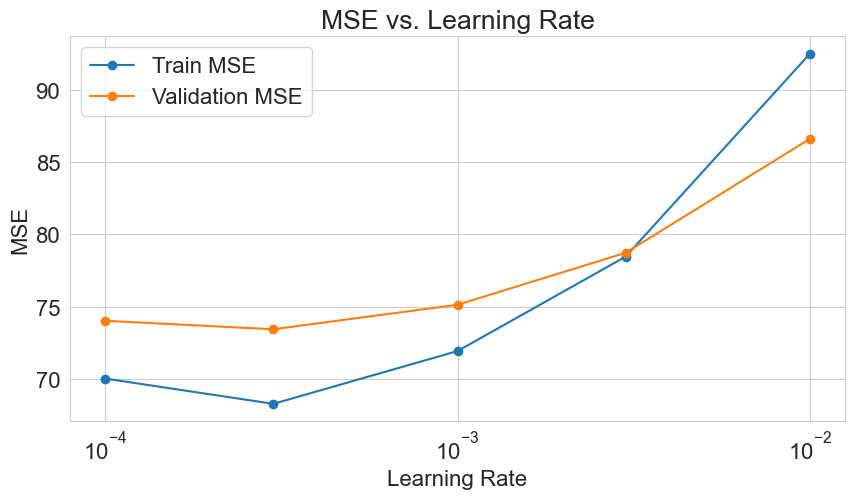

In [60]:
# 1. Подбор Learning Rate
print("--- Подбор Learning Rate ---")
lr_values = [0.0001, 0.0003, 0.001, 0.003, 0.01] # np.logspace(-4, -2, num=5)  # Логарифмическая сетка
lr_train_mses = []
lr_val_mses = []

for lr in lr_values:
    print(f"Testing lr = {lr}")
    # Создаем копию модели для каждого запуска
    model_lr_tune = copy.deepcopy(base_model)
    optimizer = torch.optim.Adam(
        model_lr_tune.parameters(),
        lr=lr,
        betas=betas,
        eps=eps,
        weight_decay=0 # Пока без weight decay
    )

    train_mse, val_mse = train_and_validate(
        model=model_lr_tune,
        optimizer=optimizer,
        criterion=nn.MSELoss(),
        metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean().item(), # .item() чтобы получить число
        train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        val_loader=DataLoader(val_dataset, batch_size=batch_size),
        num_epochs=num_epochs,
        verbose=False # Отключаем вывод прогресса для ускорения
    )
    print(f"  Train MSE: {train_mse:.2f}, Val MSE: {val_mse:.2f}")
    wandb.log(
        {
            "train_metric": train_mse,
            "val_metric": val_mse,
            "learning_rate": lr,
            "weight_decay": 0,
        }
    )
    lr_train_mses.append(train_mse)
    lr_val_mses.append(val_mse)

# Находим лучший lr по валидации
best_lr_index = np.argmin(lr_val_mses)
best_lr = lr_values[best_lr_index]
wandb.log({
    "best_learning_rate": best_lr,
})
print(f"\nBest lr found: {best_lr} (Validation MSE: {lr_val_mses[best_lr_index]:.2f})")

# Строим график для lr
plt.figure(figsize=(10, 5))
plt.plot(lr_values, lr_train_mses, marker='o', label='Train MSE')
plt.plot(lr_values, lr_val_mses, marker='o', label='Validation MSE')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs. Learning Rate')
plt.legend()
plt.grid(True)
plt.show()



--- Подбор Weight Decay (using best_lr = 0.0003) ---
Testing weight_decay = 0
  Train MSE: 68.49, Val MSE: 73.80
Testing weight_decay = 1e-06
  Train MSE: 69.54, Val MSE: 73.88
Testing weight_decay = 3e-06
  Train MSE: 70.78, Val MSE: 74.36
Testing weight_decay = 1e-05
  Train MSE: 73.81, Val MSE: 75.03
Testing weight_decay = 3e-05
  Train MSE: 76.70, Val MSE: 77.21
Testing weight_decay = 0.0001
  Train MSE: 80.19, Val MSE: 80.29
Testing weight_decay = 0.0003
  Train MSE: 82.62, Val MSE: 82.47
Testing weight_decay = 0.001
  Train MSE: 85.08, Val MSE: 84.38

Best weight_decay found: 0 (Validation MSE: 73.80)


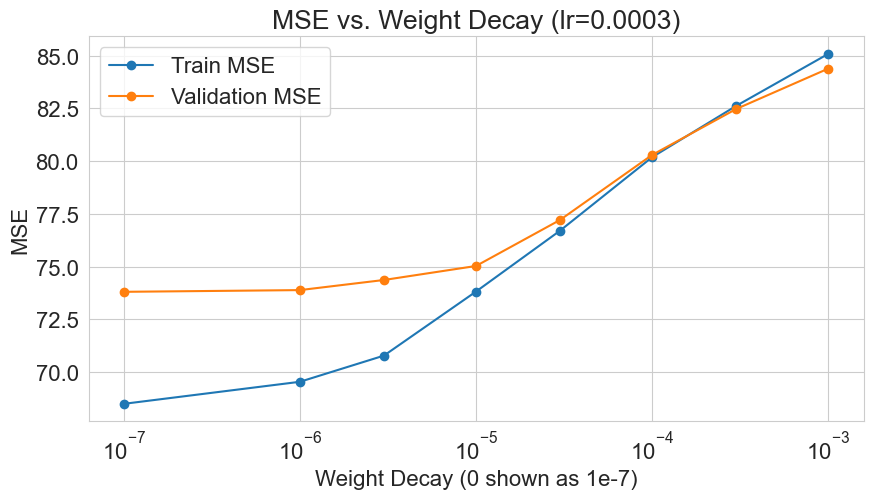


Оптимальные гиперпараметры:
Learning Rate: 0.0003
Weight Decay: 0


best_learning_rate,▁
best_weight_decay,▁
learning_rate,▁▁▂▃█▁▁▁▁▁▁▁▁
train_metric,▂▁▂▄█▁▁▂▃▃▄▅▆
val_metric,▁▁▂▄█▁▁▁▂▃▅▆▇
weight_decay,▁▁▁▁▁▁▁▁▁▁▂▃█
best_learning_rate,0.0003
best_weight_decay,0
learning_rate,0.0003
train_metric,85.08384
val_metric,84.38435


In [61]:
# --- 2. Подбор Weight Decay (с использованием лучшего lr) ---
print(f"\n--- Подбор Weight Decay (using best_lr = {best_lr}) ---")
wd_values = [0, 1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3] # Логарифмическая сетка + 0
wd_train_mses = []
wd_val_mses = []

for wd in wd_values:
    print(f"Testing weight_decay = {wd}")
    # Создаем копию модели
    model_wd_tune = copy.deepcopy(base_model)
    optimizer = torch.optim.Adam(
        model_wd_tune.parameters(),
        lr=best_lr, # Используем лучший найденный lr
        betas=betas,
        eps=eps,
        weight_decay=wd # Текущее значение weight decay
    )

    train_mse, val_mse = train_and_validate(
        model=model_wd_tune,
        optimizer=optimizer,
        criterion=nn.MSELoss(),
        metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean().item(),
        train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
        val_loader=DataLoader(val_dataset, batch_size=batch_size),
        num_epochs=num_epochs,
        verbose=False
    )
    wandb.log({
        "train_metric": train_mse,
        "val_metric": val_mse,
        "learning_rate": best_lr,
        "weight_decay": wd,
    })
    print(f"  Train MSE: {train_mse:.2f}, Val MSE: {val_mse:.2f}")
    wd_train_mses.append(train_mse)
    wd_val_mses.append(val_mse)

# Находим лучший wd по валидации
best_wd_index = np.argmin(wd_val_mses)
best_wd = wd_values[best_wd_index]
wandb.log({
    "best_weight_decay": best_wd,
})
print(f"\nBest weight_decay found: {best_wd} (Validation MSE: {wd_val_mses[best_wd_index]:.2f})")

# Строим график для weight decay
plt.figure(figsize=(10, 5))
# Для логарифмической шкалы x заменим 0 на очень маленькое значение для отображения
wd_plot_values = [val if val > 0 else 1e-7 for val in wd_values] # Замена 0 для лог шкалы
plt.plot(wd_plot_values, wd_train_mses, marker='o', label='Train MSE')
plt.plot(wd_plot_values, wd_val_mses, marker='o', label='Validation MSE')
plt.xscale('log')
plt.xlabel('Weight Decay (0 shown as 1e-7)')
plt.ylabel('MSE')
plt.title(f'MSE vs. Weight Decay (lr={best_lr})')
plt.legend()
plt.grid(True)
plt.show()

print("\nОптимальные гиперпараметры:")
print(f"Learning Rate: {best_lr}")
print(f"Weight Decay: {best_wd}")

wandb.finish()

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [62]:
# Заново соберем данные, т.к. мы в начале испортили X_train
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Трансформация данных**

Я понимаю, что трансформировать тестовые данные вообще говоря нельзя и все необходимые трансформации должны быть встроены в пайплайн, но я еще не освоил CustomDataset и Transformations.  
Поэтому сейчас просто сделаю трансформации как в предыдуищх заданиях и для обучающей выборки, и для тестовой:
- приведение всех признаков в **[0, 1]** диапазон, (коэффициэнты взяты из обучающей выборки!)
- приведение целевой переменной к **[0, 1]** диапазону (тут коэффициэнты константы - 1992 и 89)

In [63]:
# Параметры масштабирования признаков
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Масштабируем данные в диапазон [0, 1] по обучающей выборке
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# Конвертируем в PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# Масштабируем целевую переменную в диапазон [0, 1]
y_train_tensor = torch.tensor(normalize(y_train), dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(normalize(y_test), dtype=torch.float32).reshape(-1, 1)

# Создадим TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [64]:
# Зададим сеть
input_size = X_train.shape[1]  # Число признаков (90)
hidden_size = 256
model_2_5 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Dropout(p=0.2),  # Dropout для регуляризации
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),  
    nn.Dropout(p=0.2),  # Dropout для регуляризации
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()  # Sigmoid для нормализации выхода в [0, 1]
)

lr = 0.0003
weight_decay = 0
num_epochs = 15
batch_size = 32
betas = (0.9, 0.999)
eps = 1e-8

# инициализируем проект
wandb.init(project="dl-hw1", name="regression-2.5",
           config={
            "model": "90->256->256->1->Sigmoid",
            "batch_size": batch_size,
            "hidden_size": hidden_size,
            "learning_rate": lr,
            "dataset": "scaled target + features",
            "optimizer": "Adam",
            "loss": "MSELoss",
            "metric": "MSE",
            "num_epochs": num_epochs,
            "betas": betas,
            "eps": eps,
            "weight_decay": weight_decay
},)
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model_2_5, log="all", log_freq=10)
wandb.config.update(model_2_5.state_dict())

# Запускаем модель
train_mse, test_mse = train_and_validate(
    model=model_2_5,
    optimizer=torch.optim.Adam(
        model_2_5.parameters(), 
        lr=lr, 
        betas=betas, 
        eps=eps,
        weight_decay=weight_decay
    ),
    criterion=nn.MSELoss(),
    metric=lambda y_pred, y_true: (denormalize(y_pred.reshape(-1)) - denormalize(y_true.reshape(-1))).pow(2).mean().item(),
    train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    val_loader=DataLoader(test_dataset, batch_size=batch_size),
    num_epochs=num_epochs,
    verbose=True,
    wandb=wandb,
)
print(f"Final training MSE: {train_mse:.2f}")
print(f"Final test MSE: {test_mse:.2f}")

wandb.finish()


Validating 15/15: 100%|██████████| 4027/4027 [00:02<00:00, 1883.83it/s, loss=0.00185, MSE=14.7] 

Validation MSE: 75.146
Final training MSE: 68.95
Final test MSE: 75.15


train_loss,█▅▄▄▃▃▃▂▂▂▂▂▁▁▁
train_metric,█▅▄▄▃▃▃▂▂▂▂▂▁▁▁
val_loss,█▄▃▃▂▃▁▂▁▂▂▁▁▂▂
val_metric,█▄▃▃▂▃▁▂▁▂▂▁▁▂▂
train_loss,0.00871
train_metric,68.95262
val_loss,0.00949
val_metric,75.14612


И наконец просто применим обученную модель к тестовым данным и посчитаем MSE.

In [ ]:
import torch.nn.functional as F

with torch.no_grad():
    predictions = model_2_5(X_test_tensor)

mse_test = F.mse_loss(denormalize(predictions), denormalize(y_test_tensor))

print(f"Test MSE: {mse_test:.2f}")


Test MSE: 75.15


### Итоговые выводы Части 2


**Цель Части 2:** Улучшение качества нейронной сети для задачи регрессии, построенной и стабилизированной в Части 1.

**Основные этапы и результаты экспериментов:**

1.  **Выбор оптимизатора (Задание 2.1):**
    *   Сравнивались SGD с моментумом и Adam на базовой архитектуре с нормализованными данными.
    *   **Adam** показал лучшую производительность, достигнув меньшего MSE на валидации (≈78) по сравнению с SGD+momentum (≈81) за то же количество эпох. Поэтому Adam был выбран для дальнейших экспериментов.

2.  **Усложнение архитектуры (Задание 2.2):**
    *   Исследовалось увеличение ширины (скрытый слой 256 нейронов) и глубины (добавление второго скрытого слоя 256->256) сети.
    *   Более сложная модель (90->256->256->1+Sigmoid) показала небольшое улучшение MSE на валидации (≈77.3) по сравнению с исходной (90->128->1+Sigmoid, ≈78 с Adam).
    *   Однако, усложнение модели привело к **усилению переобучения**: разрыв между MSE на обучении (≈66.3) и валидации (≈77.3) увеличился.

3.  **Регуляризация Dropout (Задание 2.3):**
    *   В более сложную модель (90->256->256->1+Sigmoid) был добавлен Dropout (p=0.2) после каждого скрытого линейного слоя.
    *   Dropout **успешно справился с переобучением**, сблизив значения MSE на обучении (≈72.8) и валидации (≈75.0).
    *   Качество на валидации также **немного улучшилось** по сравнению с моделью без Dropout.

4.  **Подбор гиперпараметров (Задание 2.4):**
    *   Для модели с Dropout подбирались оптимальные `learning rate` (lr) и `weight decay` (wd) для оптимизатора Adam.
    *   **Оптимальный lr:** Найден в районе `0.0003`. Более высокие значения приводили к ухудшению, более низкие - к медленной сходимости.
    *   **Оптимальный weight decay:** Найден равным `0`. Добавление L2-регуляризации (wd > 0) не улучшало, а ухудшало результат, вероятно, из-за того, что Dropout уже обеспечивал достаточную регуляризацию.

5.  **Финальная оценка (Задание 2.5):**
    *   Лучшая модель (90->Dropout(0.2)->ReLU->256->Dropout(0.2)->ReLU->256->Sigmoid->1) с оптимальными гиперпараметрами (Adam, lr=0.0003, wd=0) была обучена на полной обучающей выборке (train+val).
    *   Итоговое качество на **тестовой** выборке составило **MSE ≈ 75.15**.

**Итоговое сравнение с бейзлайнами:**

*   Константный прогноз (среднее): MSE ≈ 117.83
*   Ridge регрессия: MSE ≈ 89.75
*   **Лучшая нейронная сеть:** **MSE ≈ 75.15**

**Общий вывод по Части 2:**

Путем последовательных экспериментов с оптимизаторами, архитектурой, регуляризацией и гиперпараметрами удалось построить и настроить полносвязную нейронную сеть, которая **значительно превзошла** как простой константный бейзлайн, так и более сильный бейзлайн в виде Ridge регрессии. Ключевыми факторами успеха стали:
*   Нормализация входных признаков и целевой переменной (из Части 1).
*   Использование адаптивного оптимизатора Adam.
*   Применение Dropout для борьбы с переобучением в более сложной модели.
*   Тщательный подбор скорости обучения.
  


> Вывод написан нейросетью Google gemini-2.5-pro-exp-03-25 (free) при помощи Roo Code (расширение для VSCode) и кастомизированного "режима" (набор предопределенных инструкций для модели, которые добавляются в промпт).
> 
> Промпт непосредсвенно в Roo Code был такой:
> ```
> Проанализируй все задания, результаты и выводы в Части 2.
> Сформулируй итоговые выводы по Части 2.
> ```